In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fa95d4ea-8f0b-4d87-b8eb-313d6a1a6de6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-06-02T06:48:17.858Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 9728}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12206, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [67]:
type(data)

dict

In [74]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [25]:
#normalize data and make it all pretty in a dataset
df = pd.json_normalize(data['data'])

df['timestamp']= pd.to_datetime('now') #creating a column with date and time
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12206,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19873328.00000,19873328.00000,...,63.67290,2208733669185.12012,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
1,1027,Ethereum,ETH,ethereum,10322,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120723694.21201,120723694.21201,...,9.20530,301632537382.33002,None,2025-06-02T06:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
2,825,Tether USDt,USDT,tether,131279,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,153148231146.79190,156004090105.39133,...,4.67520,156051116872.06000,None,2025-06-02T06:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-02 11:28:22.773577
3,52,XRP,XRP,xrp,1621,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58759724027.00000,99986084900.00000,...,3.88400,216989679087.17999,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
4,1839,BNB,BNB,bnb,2560,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140887555.25000,140887555.25000,...,2.82660,92790827112.35001,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
5,5426,Solana,SOL,solana,930,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,522414733.03005,602120199.84245,...,2.48250,93927755025.81000,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
6,3408,USDC,USDC,usd-coin,28402,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60911809481.15401,60911809481.15401,...,1.85520,60901041795.10000,None,2025-06-02T06:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-02 11:28:22.773577
7,74,Dogecoin,DOGE,dogecoin,1232,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149514896383.70520,149514896383.70520,...,0.87520,28731459490.17000,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94865680049.20874,94865690294.92247,...,0.78230,25681258830.10000,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577
9,2010,Cardano,ADA,cardano,1527,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35337743183.17651,44994501828.18774,...,0.73460,30707572554.04000,None,2025-06-02T06:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-02 11:28:22.773577


In [3]:
#automating

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fa95d4ea-8f0b-4d87-b8eb-313d6a1a6de6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    import pandas as pd
    df= pd.json_normalize(data['data'])

    df['timestamp']= pd.to_datetime('now')

    #creating csvand appending data into csv
    if not os.path.isfile(r"C:\Users\affan\OneDrive\Documents\python tutorial\API1.csv"):
        df.to_csv(r"C:\Users\affan\OneDrive\Documents\python tutorial\API1.csv",header="column_names")
    else:
        df.to_csv(r"C:\Users\affan\OneDrive\Documents\python tutorial\API1.csv",mode='a',header=False)

In [85]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("api runner successfully completed")
    sleep(60) #sleep for 1 min
exit()

api runner successfully completed
api runner successfully completed
api runner successfully completed


KeyboardInterrupt: 

In [37]:
import pandas as pd
df2=pd.read_csv(r"C:\Users\affan\OneDrive\Documents\python tutorial\API1.csv")
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12204,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19872984.00000,...,63.72870,2183489692966.22998,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
1,1,1027,Ethereum,ETH,ethereum,10322,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120723843.90112,...,9.24080,299618749251.14001,NaN,2025-06-01T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
2,2,825,Tether USDt,USDT,tether,131252,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,153097093881.30783,...,4.72330,156054628430.82999,NaN,2025-06-01T12:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-01 16:57:30.999593
3,3,52,XRP,XRP,xrp,1621,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58759724027.00000,...,3.86640,213347623243.23001,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
4,4,1839,BNB,BNB,bnb,2559,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140887604.76000,...,2.81840,91381018528.31000,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
5,5,5426,Solana,SOL,solana,930,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,522416501.73169,...,2.43410,90961723154.82001,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
6,6,3408,USDC,USDC,usd-coin,28395,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60930193592.25787,...,1.87860,60912298423.22000,NaN,2025-06-01T12:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-01 16:57:30.999593
7,7,74,Dogecoin,DOGE,dogecoin,1232,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,149504716383.70523,...,0.86610,28082693185.27000,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
8,8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94865541629.67920,...,0.78330,25396578260.99000,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
9,9,2010,Cardano,ADA,cardano,1527,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35337743183.17651,...,0.71830,29659643225.36000,NaN,2025-06-01T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593


In [7]:
pd.set_option("display.float_format",lambda x: "%.5f" %x) #converting exponential data

In [8]:
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12204,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19872984.00000,...,63.72870,2183489692966.22998,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
1,1,1027,Ethereum,ETH,ethereum,10322,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120723843.90112,...,9.24080,299618749251.14001,NaN,2025-06-01T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
2,2,825,Tether USDt,USDT,tether,131252,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,153097093881.30783,...,4.72330,156054628430.82999,NaN,2025-06-01T12:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-01 16:57:30.999593
3,3,52,XRP,XRP,xrp,1621,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58759724027.00000,...,3.86640,213347623243.23001,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
4,4,1839,BNB,BNB,bnb,2559,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140887604.76000,...,2.81840,91381018528.31000,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
5,5,5426,Solana,SOL,solana,930,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,522416501.73169,...,2.43410,90961723154.82001,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
6,6,3408,USDC,USDC,usd-coin,28395,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60930193592.25787,...,1.87860,60912298423.22000,NaN,2025-06-01T12:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-01 16:57:30.999593
7,7,74,Dogecoin,DOGE,dogecoin,1232,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,149504716383.70523,...,0.86610,28082693185.27000,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
8,8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94865541629.67920,...,0.78330,25396578260.99000,NaN,2025-06-01T12:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593
9,9,2010,Cardano,ADA,cardano,1527,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35337743183.17651,...,0.71830,29659643225.36000,NaN,2025-06-01T12:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-01 16:57:30.999593


In [9]:
df3= df2.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d'	,'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.14232,-0.02974,-3.29723,7.00347,22.35693,11.86750
Ethereum,-0.64165,-2.04693,-1.30976,34.96860,32.74561,5.00921
Tether USDt,-0.00571,-0.00580,0.02073,0.00742,0.04396,0.06648
XRP,-0.54272,-1.24255,-7.41696,-3.93438,0.40927,-19.92885
BNB,-0.30977,-1.18970,-2.38275,8.25720,7.95440,7.25914
Solana,-0.73259,-2.52409,-12.45551,0.17897,19.54175,-7.40970
USDC,-0.01113,-0.00823,-0.01237,-0.02299,-0.02682,-0.02088
Dogecoin,-0.81587,-1.45468,-14.80139,3.19392,9.26663,-14.82647
TRON,-0.33839,-0.55816,-1.93451,9.04368,12.71784,10.11900


In [10]:
df4=df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.14232
         quote.USD.percent_change_24h    -0.02974
         quote.USD.percent_change_7d     -3.29723
         quote.USD.percent_change_30d     7.00347
         quote.USD.percent_change_60d    22.35693
                                           ...   
Stellar  quote.USD.percent_change_24h    -0.52953
         quote.USD.percent_change_7d     -7.20440
         quote.USD.percent_change_30d    -5.40009
         quote.USD.percent_change_60d    -2.03297
         quote.USD.percent_change_90d   -20.50708
Length: 90, dtype: float64

In [11]:
type(df4)

pandas.core.series.Series

In [12]:
df5=df4.to_frame().reset_index()  #changing series to dataframe and resetting index
df5

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,-0.14232
1,Bitcoin,quote.USD.percent_change_24h,-0.02974
2,Bitcoin,quote.USD.percent_change_7d,-3.29723
3,Bitcoin,quote.USD.percent_change_30d,7.00347
4,Bitcoin,quote.USD.percent_change_60d,22.35693
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.52953
86,Stellar,quote.USD.percent_change_7d,-7.20440
87,Stellar,quote.USD.percent_change_30d,-5.40009
88,Stellar,quote.USD.percent_change_60d,-2.03297


In [13]:
type(df5)

pandas.core.frame.DataFrame

In [14]:
#renaming columns
df5= df5.rename(columns={'level_1':'percent_change',0:'values'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.14232
1,Bitcoin,quote.USD.percent_change_24h,-0.02974
2,Bitcoin,quote.USD.percent_change_7d,-3.29723
3,Bitcoin,quote.USD.percent_change_30d,7.00347
4,Bitcoin,quote.USD.percent_change_60d,22.35693
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.52953
86,Stellar,quote.USD.percent_change_7d,-7.20440
87,Stellar,quote.USD.percent_change_30d,-5.40009
88,Stellar,quote.USD.percent_change_60d,-2.03297


In [15]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

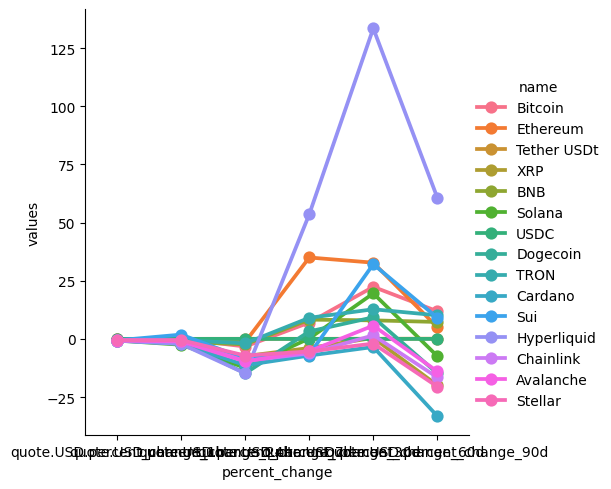

In [16]:
sns.catplot(data=df5,x='percent_change',y='values',hue='name',kind='point')

In [22]:
mapping_dict= {	'quote.USD.percent_change_1h':'1h',	'quote.USD.percent_change_24h':'24h','quote.USD.percent_change_7d':'7d','quote.USD.percent_change_30d':'30d','quote.USD.percent_change_60d':'60d','quote.USD.percent_change_90d' :'90d'}     
df5['percent_change']=df5['percent_change'].map(mapping_dict)
df5

,name,percent_change,values
0,Bitcoin,1h,-0.14232
1,Bitcoin,24h,-0.02974
2,Bitcoin,7d,-3.29723
3,Bitcoin,30d,7.00347
4,Bitcoin,60d,22.35693
...,...,...,...
85,Stellar,24h,-0.52953
86,Stellar,7d,-7.20440
87,Stellar,30d,-5.40009
88,Stellar,60d,-2.03297


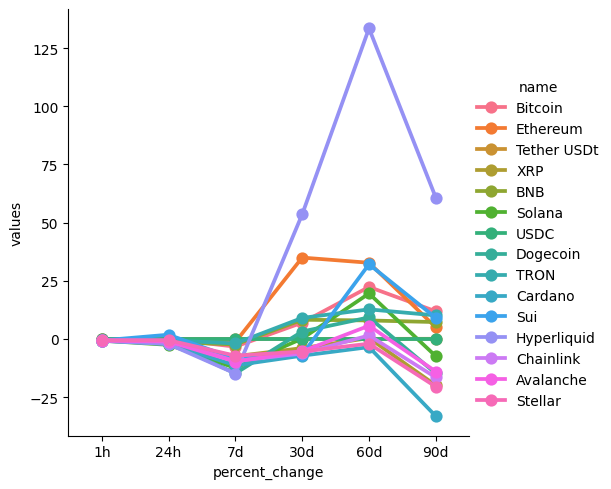

In [23]:
sns.catplot(data=df5,x='percent_change',y='values',hue='name',kind='point')

In [31]:
df6=df2[['name','quote.USD.price','timestamp']]
df6

,name,quote.USD.price,timestamp
0,Bitcoin,103975.69967,2025-06-01 16:57:30.999593
1,Ethereum,2481.85230,2025-06-01 16:57:30.999593
2,Tether USDt,1.00032,2025-06-01 16:57:30.999593
3,XRP,2.13348,2025-06-01 16:57:30.999593
4,BNB,648.60936,2025-06-01 16:57:30.999593
5,Solana,151.06887,2025-06-01 16:57:30.999593
6,USDC,0.99971,2025-06-01 16:57:30.999593
7,Dogecoin,0.18784,2025-06-01 16:57:30.999593
8,TRON,0.26771,2025-06-01 16:57:30.999593
9,Cardano,0.65910,2025-06-01 16:57:30.999593


In [41]:
df7=df6[df6['name'].str.contains('Bitcoin')]
df7
#or
#df7=df6.query("name=='bitcoin'")

,name,quote.USD.price,timestamp
0,Bitcoin,103975.69967,2025-06-01 16:57:30.999593
15,Bitcoin,103981.81985,2025-06-01 16:58:31.696658
30,Bitcoin,103987.79917,2025-06-01 16:59:32.014899


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

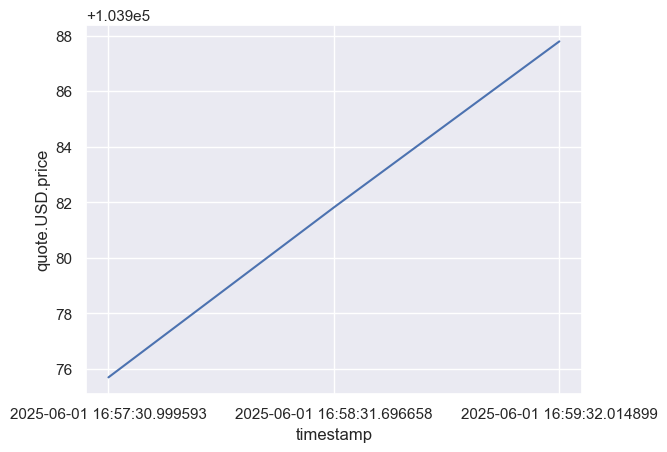

In [48]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=df7,x='timestamp',y='quote.USD.price'	)